In [96]:
from decimal import Decimal
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('..\\datasets\\2. spotify_tracks\\dataset.csv')
pd.reset_option('display.max_rows')

# Visualizaciones en Python

**Alumno**: Javier López Malone 

**Profesora**: Estefania Karina Susanj 

**Tutor**: Rubén Baquel

**Dataset seleccionado**: Spotify tracks

## Información del dataset y descripción de las columnas

Es un conjunto de datos de pistas de Spotify en una variedad de 125 géneros diferentes. Cada pista tiene algunas funciones de audio asociadas.

### Descripción de las columnas


* **track_id** : ID de Spotify para la pista.
* **artists** : Nombres de los artistas que interpretaron la pista. Si hay más de un artista, están separados por un;
* **album_name** : Nombre del álbum en el que aparece la pista.
* **track_name** : Nombre de la pista.
* **popularity** : Popularidad de una pista es un valor entre 0 y 100, siendo 100 el más popular . La popularidad se calcula mediante un algoritmo y se basa, en su mayor parte, en el número total de reproducciones que ha tenido la pista y en lo recientes que son esas reproducciones. En términos generales, las canciones que se reproducen mucho ahora tendrán mayor popularidad que las canciones que se reproducen mucho en el pasado. Las pistas duplicadas (por ejemplo, la misma pista de un sencillo y un álbum) se clasifican de forma independiente. La popularidad del artista y del álbum se deriva matemáticamente de la popularidad de la pista.
* **duration_ms** : Duración de la pista en milisegundos.
* **explicit** : Indica si la pista tiene letras explícitas o no (verdadero = sí, falso = no tiene o es desconocido)
* **danceability** : Describe qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales que incluyen el tempo, la estabilidad del ritmo, la fuerza del ritmo y la regularidad general. Un valor de 0,0 es el menos bailable y 1,0 es el más bailable.
* **energy** : Es una medida de 0,0 a 1,0 y representa una medida perceptual de intensidad y actividad. Normalmente, las pistas enérgicas se sienten rápidas y ruidosas. Por ejemplo, el death metal tiene mucha energía, mientras que un preludio de Bach obtiene una puntuación baja en la escala.
* **key** : Clave en la que se encuentra la pista. Los números enteros se asignan a los tonos utilizando la notación estándar de clase de tono. Por ejemplo 0 = C, 1 = C♯/D♭, 2 = D, etc. Si no se detectó ninguna clave, el valor es -1.
* **loudness** : El volumen general de una pista en decibeles (dB).
* **mode** : Indica la modalidad (mayor o menor) de una pista, el tipo de escala de la que se deriva su contenido melódico. El mayor está representado por 1 y el menor es 0.
* **speechiness** : Detecta la presencia de palabras habladas en una pista. Cuanto más exclusivamente hablada sea la grabación (p. ej., programa de entrevistas, audiolibro, poesía), más cercano a 1,0 será el valor del atributo. Los valores superiores a 0,66 describen pistas que probablemente estén compuestas exclusivamente de palabras habladas. Los valores entre 0,33 y 0,66 describen pistas que pueden contener música y voz, ya sea en secciones o en capas, incluidos casos como la música rap. Los valores por debajo de 0,33 probablemente representen música y otras pistas que no sean de voz.
* **acousticness** : Es una medida de confianza de 0,0 a 1,0 de si la pista es acústica. 1.0 representa una alta confianza en que la pista es acústica.
* **instrumentalness** : Indica si una pista no contiene voces. Los sonidos "Ooh" y "aah" se tratan como instrumentales en este contexto. Las pistas de rap o de palabra hablada son claramente "vocales". Cuanto más cerca esté el valor de instrumentalidad de 1,0, mayor será la probabilidad de que la pista no contenga contenido vocal.
* **liveness** : Detecta la presencia de una audiencia en la grabación. Los valores de vida más altos representan una mayor probabilidad de que la pista se haya interpretado en vivo. Un valor superior a 0,8 proporciona una gran probabilidad de que la pista esté activa.
* **valence** : Una medida de 0,0 a 1,0 que describe la positividad musical transmitida por una pista. Las pistas con valencia alta suenan más positivas (p. ej., felices, alegres, eufóricas), mientras que las pistas con valencia baja suenan más negativas (p. ej., tristes, deprimidas, enojadas).
* **tempo** : El tempo general estimado de una pista en pulsaciones por minuto (BPM). En terminología musical, el tempo es la velocidad o ritmo de una pieza determinada y se deriva directamente de la duración promedio del tiempo.
* **time_signature** : un compás estimado. El tipo de compás (metro) es una convención de notación para especificar cuántos tiempos hay en cada compás. El tipo de compás varía de 3 a 7, lo que indica tipos de compás de 3/4, a 7/4.
* **track_genre** : El género al que pertenece la pista.

In [97]:
# HELPER FUNCTIONS

def variation_coefficient(dataFrame: pd.DataFrame, column_name:str|list=None) -> pd.Series | Decimal:
    if column_name is None:
        # Si no se pasa un nombre de columna, calcular el coeficiente de variación para cada columna
        coefficients = {}
        for col in dataFrame.columns:
            if pd.api.types.is_numeric_dtype(dataFrame[col]):
                std = dataFrame[col].std()
                mean = dataFrame[col].mean()
                coefficient = Decimal(std / mean) if mean != 0 else 0
                coefficients[col] = round(coefficient, 2)
            else:
                coefficients[col] = None
        return pd.Series(coefficients)
    elif isinstance(column_name, str):
        # Si se pasa un solo nombre de columna, calcular el coeficiente de variación para esa columna
        if pd.api.types.is_numeric_dtype(dataFrame[column_name]):
            std = dataFrame[column_name].std()
            mean = dataFrame[column_name].mean()
            coefficient = Decimal(std / mean) if mean != 0 else 0
            return round(coefficient, 2)
        else:
            return None
    elif isinstance(column_name, list):
        # Si se pasa una lista de nombres de columnas, calcular el coeficiente de variación para esas columnas
        coefficients = {}
        for col in column_name:
            if pd.api.types.is_numeric_dtype(dataFrame[col]):
                std = dataFrame[col].std()
                mean = dataFrame[col].mean()
                coefficient = Decimal(std / mean) if mean != 0 else 0
                coefficients[col] = round(coefficient, 2)
            else:
                coefficients[col] = None
        return pd.Series(coefficients)
    else:
        raise ValueError("El argumento 'column_name' debe ser un string, una lista de strings o None.")

def custom_describe(dataFrame: pd.DataFrame, columns:str|list=None):
    if columns is None:
        columns = dataFrame.columns.to_list()

    df_describe = dataFrame[columns].describe()
    
    df_mode = dataFrame[columns].mode()
    df_mode.index = ['mode'] * len(df_mode)

    df_variation_coefficient = variation_coefficient(dataFrame, columns)

    df_describe.loc['variation_coefficient'] = df_variation_coefficient
    
    df_describe = pd.concat([df_describe, df_mode], axis=0)
    
    return df_describe

def get_outliers_IQR(dataFrame: pd.DataFrame, columns:str|list=None):
    if columns is None:
        columns = dataFrame[dataFrame.columns[(dataFrame.dtypes == 'float64') | (dataFrame.dtypes == 'int64')]].columns.to_list()
    
    Q1 = dataFrame[columns].quantile(0.25)
    Q3 = dataFrame[columns].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return (dataFrame[columns] < lower_bound) | (dataFrame[columns] > upper_bound)

## Limpieza de datos

Elimino columna _Unnamed: 0_

In [98]:
df = df.drop('Unnamed: 0', axis='columns')

Detallo la información de mi dataset:

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [100]:
print (f"Hay {df['track_genre'].nunique()} géneros musicales en mi dataset")

Hay 114 géneros musicales en mi dataset


In [101]:
df.groupby('track_genre')['track_id'].count()

track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
               ... 
techno         1000
trance         1000
trip-hop       1000
turkish        1000
world-music    1000
Name: track_id, Length: 114, dtype: int64

Mi muestra tiene 1000 canciones por género musical.

* Evalúo si hay nulos

In [102]:
print(df.isnull().sum())

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


Mi muestra tiene 1000 canciones por género musical, pero hay 1 canción que no tiene información de artista, album y nombre de canción

In [103]:
print(f"El género {df[df['artists'].isnull()]['track_genre'].values[0]} tiene la canción con datos erroneos")
df[df['artists'].isnull()]

El género k-pop tiene la canción con datos erroneos


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


Elimino esa canción

In [104]:
df = df.dropna(subset=['artists'])

* Evalúo si hay duplicados y los elimino

In [105]:
duplicates = df[df.duplicated(keep=False)].value_counts(subset=['track_id', 'artists', 'album_name', 'track_name']).reset_index()
print("Filas duplicadas:")
duplicates

Filas duplicadas:


,track_id,artists,album_name,track_name,count
0,6P2z6tZi1K8pyHXV1i0DnK,Nikolay Kopylov,У камина (Старинные Русские Романсы)/ At a Fir...,Твои глаза зеленые ( Green Eyes),3
1,0jI5ex80hYYbLQsX3G5Ze7,Hans Zimmer;Henning Lohner;Martin Tillman;Fiac...,Hans Zimmer: Epic Scores,The Well,3
2,2abeQBWSIzjO8J1KrPFZHy,Oleg Pogudin,Русский романс. Часть I,Забыли вы…,3
3,52VSOpFbg4GBpPNNv4ulbP,"Группа ""Загадка""",20 золотых дворовых песен. Разлука,В больнице больная лежала,3
4,5sP7Jb0FBF2fatb1CZ3zpa,Hans Zimmer;Lisa Gerrard;Gavin Greenaway;The L...,Hans Zimmer: Epic Scores,"The Gladiator Waltz - From ""Gladiator"" Soundtrack",3
...,...,...,...,...,...
439,2ldVpRwLjfUWCDqrjNQYWt,Daddy Yankee;Bad Bunny,Perreo en Halloween,X ÚLTIMA VEZ,2
440,2lTWvfqX8itVpHvQ8EMhS6,Wolfgang Amadeus Mozart;Academy of St. Martin ...,Mozart - All Day Classics,"The London Sketchbook, K. 15a-ss (arr. and/or ...",2
441,2k07yELPvHZEqwdRzROUpc,Hans Zimmer;Adam Lukas;James Everingham;AURORA,Frozen Planet II (Original Television Soundtrack),Losing Ice,2
442,2jqBkZ3VhBeuTLwXZtfSGe,Georgi Vinogradov;The Red Army Choir,Когда поют солдаты...,Соловьи,2


In [106]:
# Elimino los duplicados
df = df.drop_duplicates(subset=['track_id', 'artists', 'album_name', 'track_name'], keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89740 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          89740 non-null  object 
 1   artists           89740 non-null  object 
 2   album_name        89740 non-null  object 
 3   track_name        89740 non-null  object 
 4   popularity        89740 non-null  int64  
 5   duration_ms       89740 non-null  int64  
 6   explicit          89740 non-null  bool   
 7   danceability      89740 non-null  float64
 8   energy            89740 non-null  float64
 9   key               89740 non-null  int64  
 10  loudness          89740 non-null  float64
 11  mode              89740 non-null  int64  
 12  speechiness       89740 non-null  float64
 13  acousticness      89740 non-null  float64
 14  instrumentalness  89740 non-null  float64
 15  liveness          89740 non-null  float64
 16  valence           89740 non-null  float64
 1

* Evalúo los formatos de las columnas de interes:

    * Popularidad de la pista (popularity)

    * Duración de la pista (duration_ms)

    * Bailabilidad (danceability), energía (energy), tempo (tempo)

In [107]:
print(f"Popularidad de la pista\n\nTipo de dato: {df['popularity'].dtypes} | Max: {df['popularity'].max()} | Min: {df['popularity'].min()} | Media: {df['popularity'].mean()}")

Popularidad de la pista

Tipo de dato: int64 | Max: 100 | Min: 0 | Media: 33.19880766659238


In [108]:
print(f"Duración de la pista\n\nTipo de dato: {df['duration_ms'].dtypes} | Max: {df['duration_ms'].max()} | Min: {df['duration_ms'].min()} | Media: {df['duration_ms'].mean()}")

Duración de la pista

Tipo de dato: int64 | Max: 5237295 | Min: 8586 | Media: 229144.36557833743


In [109]:
print(f"Bailabilidad\n\nTipo de dato: {df['danceability'].dtypes} | Max: {df['danceability'].max()} | Min: {df['danceability'].min()} | Media: {df['danceability'].mean()}")

print(f"\n\nEnergía\n\nTipo de dato: {df['energy'].dtypes} | Max: {df['energy'].max()} | Min: {df['energy'].min()} | Media: {df['energy'].mean()}")

print(f"\n\nTempo\n\nTipo de dato: {df['tempo'].dtypes} | Max: {df['tempo'].max()} | Min: {df['tempo'].min()} | Media: {df['tempo'].mean()}")

Bailabilidad

Tipo de dato: float64 | Max: 0.985 | Min: 0.0 | Media: 0.5621663550256297


Energía

Tipo de dato: float64 | Max: 1.0 | Min: 0.0 | Media: 0.6344584717695565


Tempo

Tipo de dato: float64 | Max: 243.372 | Min: 0.0 | Media: 122.05813423222641


* Evalúo la distribución de los campos de interés:

    * Popularidad de la pista (popularity)

    * Duración de la pista (duration_ms)

    * Bailabilidad (danceability), energía (energy), Tempo (tempo)


In [110]:
numerical_cols = df[df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]]
numerical_cols.shape

(89740, 14)

In [111]:
custom_describe(df, numerical_cols.columns.to_list())

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,89740.0,89740.0,89740.0,89740.0,89740.0,89740.0,89740.0,89740.0,89740.0,89740.0,89740.0,89740.0,89740.0,89740.0
mean,33.198808,229144.365578,0.562166,0.634458,5.28353,-8.498994,0.636973,0.087442,0.328285,0.173415,0.216971,0.469474,122.058134,3.897426
std,20.58064,112945.780336,0.176692,0.256606,3.559912,5.221518,0.480875,0.113278,0.338321,0.323849,0.194885,0.262864,30.117651,0.453437
min,0.0,8586.0,0.0,0.0,0.0,-49.531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,19.0,173040.0,0.45,0.457,2.0,-10.32225,0.0,0.036,0.0171,0.0,0.0982,0.249,99.26275,4.0
50%,33.0,213295.5,0.576,0.676,5.0,-7.185,1.0,0.0489,0.188,0.000058,0.132,0.457,122.013,4.0
75%,49.0,264293.0,0.692,0.853,8.0,-5.108,1.0,0.0859,0.625,0.097625,0.279,0.682,140.077,4.0
max,100.0,5237295.0,0.985,1.0,11.0,4.532,1.0,0.965,0.996,1.0,1.0,0.995,243.372,5.0
variation_coefficient,0.62,0.49,0.31,0.40,0.67,-0.61,0.75,1.30,1.03,1.87,0.90,0.56,0.25,0.12
mode,0,180000,0.631,0.961,7,-5.956,1,0.0324,0.995,0.0,0.111,0.961,0.0,4


In [112]:
outliers=get_outliers_IQR(df)
# Muestro el número de valores atípicos de cada característica
print(outliers.sum())

popularity             11
duration_ms          4225
danceability          474
energy                  0
key                     0
loudness             5026
mode                    0
speechiness         10644
acousticness            0
instrumentalness    19613
liveness             6981
valence                 0
tempo                 514
time_signature      10197
dtype: int64


Se eliminan outliers del campo `popularity`:

In [113]:
custom_describe(df, numerical_cols.columns.tolist())

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,89740.0,89740.0,89740.0,89740.0,89740.0,89740.0,89740.0,89740.0,89740.0,89740.0,89740.0,89740.0,89740.0,89740.0
mean,33.198808,229144.365578,0.562166,0.634458,5.28353,-8.498994,0.636973,0.087442,0.328285,0.173415,0.216971,0.469474,122.058134,3.897426
std,20.58064,112945.780336,0.176692,0.256606,3.559912,5.221518,0.480875,0.113278,0.338321,0.323849,0.194885,0.262864,30.117651,0.453437
min,0.0,8586.0,0.0,0.0,0.0,-49.531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,19.0,173040.0,0.45,0.457,2.0,-10.32225,0.0,0.036,0.0171,0.0,0.0982,0.249,99.26275,4.0
50%,33.0,213295.5,0.576,0.676,5.0,-7.185,1.0,0.0489,0.188,0.000058,0.132,0.457,122.013,4.0
75%,49.0,264293.0,0.692,0.853,8.0,-5.108,1.0,0.0859,0.625,0.097625,0.279,0.682,140.077,4.0
max,100.0,5237295.0,0.985,1.0,11.0,4.532,1.0,0.965,0.996,1.0,1.0,0.995,243.372,5.0
variation_coefficient,0.62,0.49,0.31,0.40,0.67,-0.61,0.75,1.30,1.03,1.87,0.90,0.56,0.25,0.12
mode,0,180000,0.631,0.961,7,-5.956,1,0.0324,0.995,0.0,0.111,0.961,0.0,4


In [114]:
outliers = get_outliers_IQR(df,numerical_cols.columns.tolist())
_ = df.drop(df[outliers['popularity']].index, axis=0, inplace=True)

outliers = get_outliers_IQR(df,numerical_cols.columns.tolist())
_ = df.drop(df[outliers['duration_ms']].index, axis=0, inplace=True)

custom_describe(df, numerical_cols.columns.tolist())

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,85504.0,85504.0,85504.0,85504.0,85504.0,85504.0,85504.0,85504.0,85504.0,85504.0,85504.0,85504.0,85504.0,85504.0
mean,33.497263,214936.132637,0.563811,0.63504,5.278747,-8.393115,0.639397,0.087501,0.331592,0.158855,0.216075,0.476368,122.092381,3.898461
std,20.645364,66793.064555,0.173964,0.256402,3.559897,5.185343,0.480178,0.112181,0.337824,0.312813,0.192748,0.261092,30.328487,0.451169
min,0.0,36170.0,0.0,0.0,0.0,-49.531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,19.0,171026.0,0.454,0.457,2.0,-10.19,0.0,0.0358,0.0191,0.0,0.0985,0.26,98.9395,4.0
50%,34.0,209997.0,0.577,0.677,5.0,-7.078,1.0,0.0489,0.195,0.000039,0.133,0.466,121.97,4.0
75%,49.0,255047.75,0.691,0.854,8.0,-5.044,1.0,0.0867,0.629,0.0512,0.278,0.687,140.50725,4.0
max,94.0,401167.0,0.985,1.0,11.0,4.532,1.0,0.965,0.996,1.0,1.0,0.995,243.372,5.0
variation_coefficient,0.62,0.31,0.31,0.40,0.67,-0.62,0.75,1.28,1.02,1.97,0.89,0.55,0.25,0.12
mode,0,180000,0.631,0.961,7,-5.956,1,0.0324,0.995,0.0,0.111,0.961,0.0,4


Observaciones:

Aún eliminando outliers de los campos `popularity` y `duration_ms`, el coeficiente de variación es muy elevado para ambas columnas.

## Visualizaciones

Dada la cantidad de valores únicos de géneros musicales, para trabajar con los datos de género musical, nos enfocaremos en el to 5 de géneros musicales.

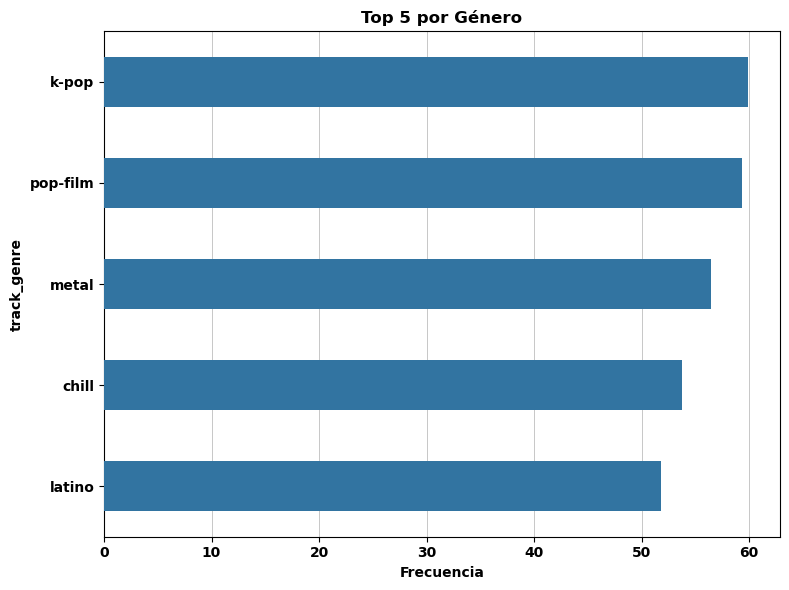

In [115]:
top_n = 5
top_genres_mean = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(top_n)

fig, axes = plt.subplots(figsize=(8, 6))

sns.barplot(x=top_genres_mean.values, y=top_genres_mean.index, ax=axes, orient='h', zorder=3, width=0.5)
axes.set_title(f'Top {top_n} por Género')
axes.set_xlabel('Frecuencia')
axes.xaxis.grid(linestyle='-', linewidth=0.5, zorder=0)

plt.tight_layout()
plt.show()

In [116]:
df_top_genres = df[df['track_genre'].isin(top_genres_mean.index)]

In [117]:
numerical_cols = df_top_genres[df_top_genres.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]]
numerical_cols.shape

(3250, 14)

### Distribución de columnas numéricas

In [118]:
custom_describe(numerical_cols)

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,3250.0,3250.0,3250.0,3250.0,3250.0,3250.0,3250.0,3250.0,3250.0,3250.0,3250.0,3250.0,3250.0,3250.0
mean,56.691385,221952.542462,0.641479,0.602872,5.298154,-7.695807,0.562154,0.089462,0.372071,0.058423,0.173104,0.506937,118.749757,3.923385
std,15.78748,67627.199312,0.141001,0.215087,3.579209,3.746019,0.496198,0.087934,0.304674,0.196787,0.126462,0.223215,29.109207,0.346429
min,0.0,40893.0,0.15,0.0307,0.0,-26.675,0.0,0.0231,0.000004,0.0,0.0202,0.0341,45.664,1.0
25%,51.0,174919.5,0.546,0.441,2.0,-9.6345,0.0,0.037325,0.085325,0.0,0.0948,0.32925,95.007,4.0
50%,59.0,214632.5,0.655,0.6225,5.0,-7.0965,1.0,0.0553,0.306,0.000005,0.123,0.509,116.0275,4.0
75%,66.0,270170.25,0.74675,0.775,8.0,-4.9425,1.0,0.10075,0.64,0.000708,0.212,0.68,139.145,4.0
max,93.0,398799.0,0.971,0.997,11.0,-0.155,1.0,0.889,0.994,0.977,0.923,0.983,208.001,5.0
variation_coefficient,0.28,0.30,0.22,0.36,0.68,-0.49,0.88,0.98,0.82,3.37,0.73,0.44,0.25,0.09
mode,57.0,170344.0,0.813,0.75,0,-5.926,1.0,0.0327,0.777,0.0,0.108,0.628,91.921,4.0


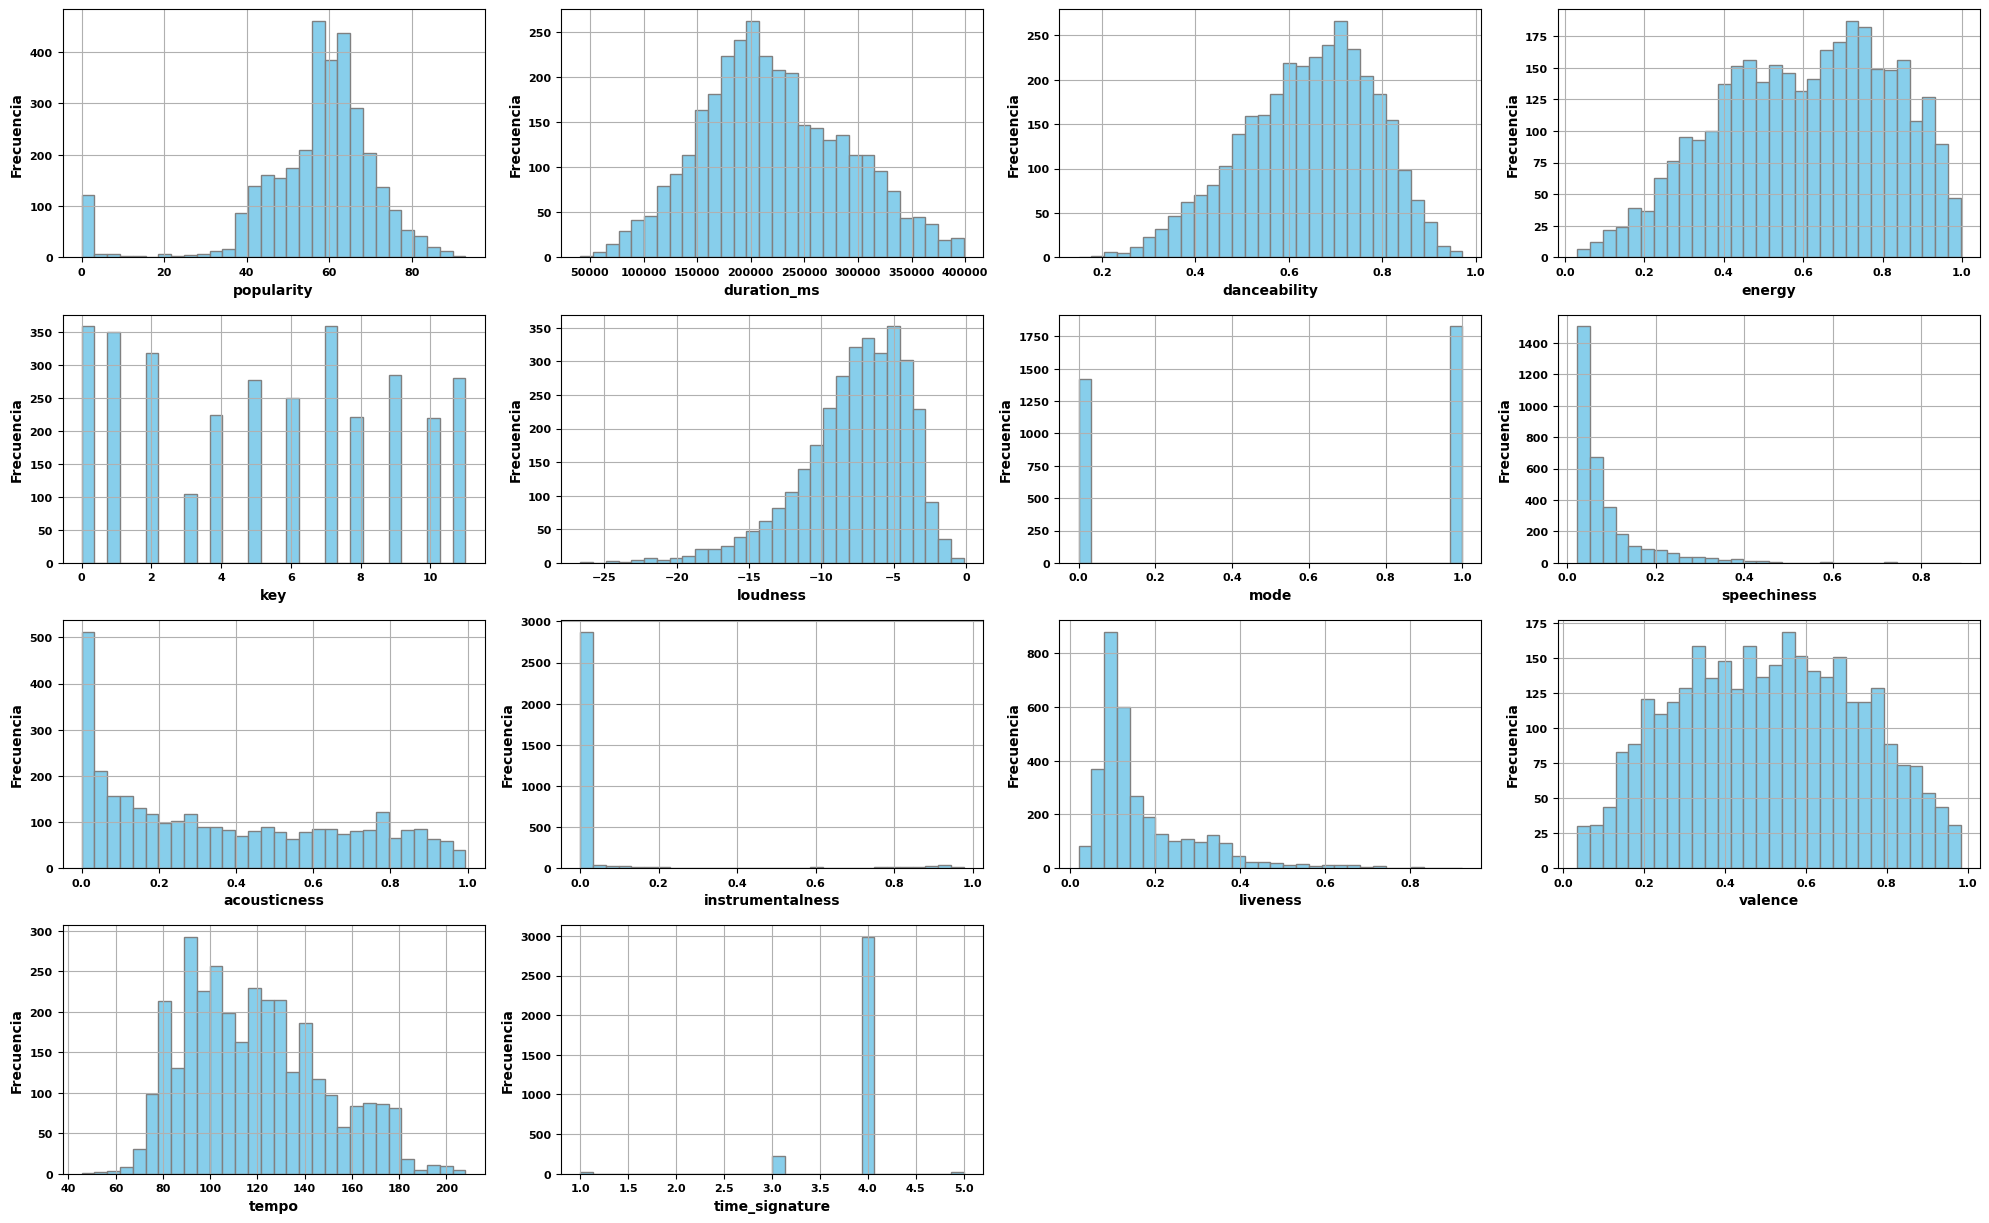

In [119]:
plt.figure(figsize=(20, 15))
cols = len(numerical_cols.columns)
num_cols = 4
num_rows = round(cols/num_cols)+1
for i, col in enumerate(numerical_cols.columns):
    plt.subplot(num_rows, num_cols, i+1)  
    plt.hist(numerical_cols[col], bins=30, color='skyblue', edgecolor='gray')  
    plt.xlabel(col)  
    plt.ylabel('Frecuencia')
    plt.xticks(fontsize=8)  
    plt.yticks(fontsize=8)  
    plt.grid(True)  

plt.tight_layout()  
plt.show()

Observaciones:

* Las columnas `duration_ms`,`danceability`, `valence` y `tempo` tienen distribuciones cercanas a la normal.
* La columna `loudness` tiene una distribución sesgada hacia la derecha, principalmente canciones con niveles de ruido que oscilan entre -15 y -5 dB.
* Las columnas `speechiness`, `acousticness`, `instrumentalness` y `liveness` tienen distribuciones sesgadas hacia la izquierda, principalmente canciones con valores muy bajos.
* En cuanto a `popularity`, hay muchas canciones con un valor cercano a 0; el resto está cerca de una distribución normal.
* La columna `energy` tiene una distribución creciente de 0 a 1, principalmente canciones con valores de 0.4 a 0.9.
* La columna `key` tiene valores distintos de 0 a 11, distribuidos de manera bastante uniforme.
* La columna `mode` tiene 2 valores, 0 y 1, con el valor 1 dominando, casi el doble que el valor 0.
* La columna `time_signature` tiene muchas canciones con un valor de 4.
* Las columnas `danceability`, `energy`, `speechiness`, `acousticness`, `instrumentalness`, `liveness` todas tienen min = 0 y max = 1.

### Distribución de popularidad

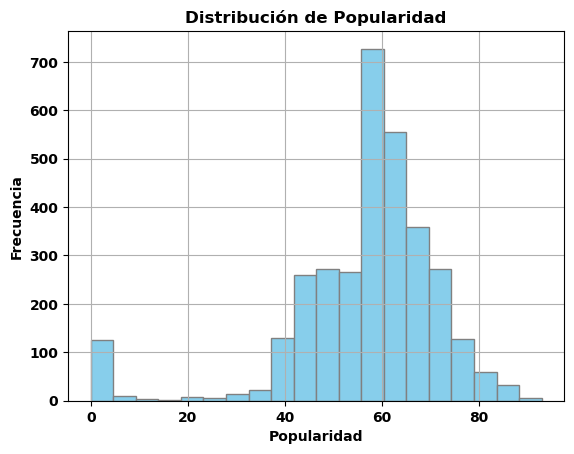

In [120]:
plt.hist(df_top_genres['popularity'], bins=20, color='skyblue', edgecolor='gray')
plt.title('Distribución de Popularidad')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Observaciones:
Se puede ver que la distribución de popularidad, tiene 2 picos marcados uno cercano a 0 y otro cercano a 20, a pesar de haberse eliminado los outliers.
El pico cercano a 0 se incrementa considerablemente cuando trabajamos con toda la muestra.

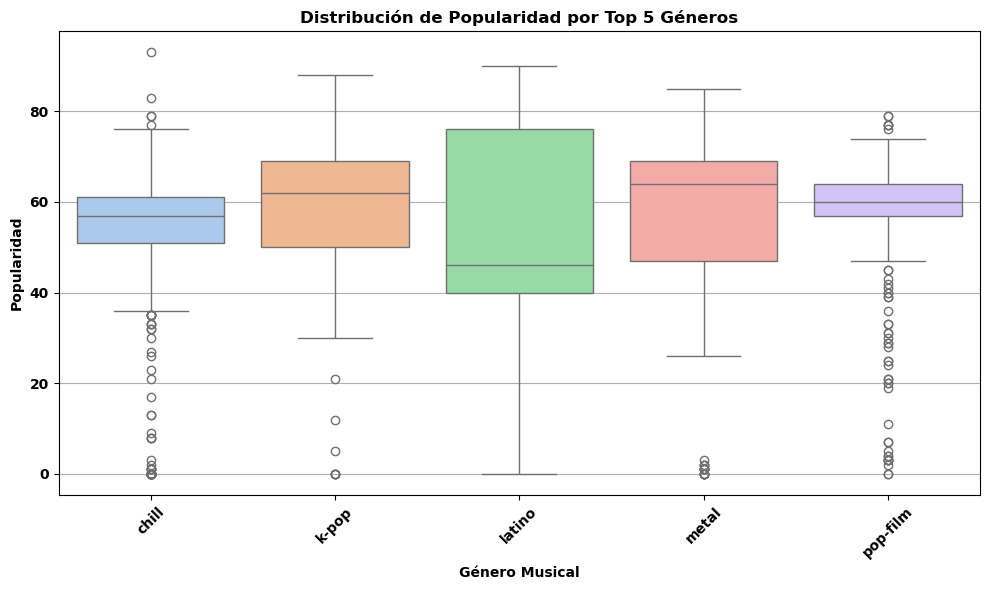

In [123]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='track_genre', y='popularity', data=df_top_genres, hue='track_genre', palette='pastel')
plt.title(f"Distribución de Popularidad por Top {top_n} Géneros")
plt.xlabel('Género Musical')
plt.ylabel('Popularidad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Observaciones:
En este gráfico se puede ver que todos los géneros tienen una popularidad similar, con algunas diferencias como el género _latino_ que tiene una distribución mas amplia, los géneros _chill_ y _pop-film_ con una distribución mas acotada centrada cerca de 60 y _k-pop_ y _metal_ con una distribución sesgada a la derecha.

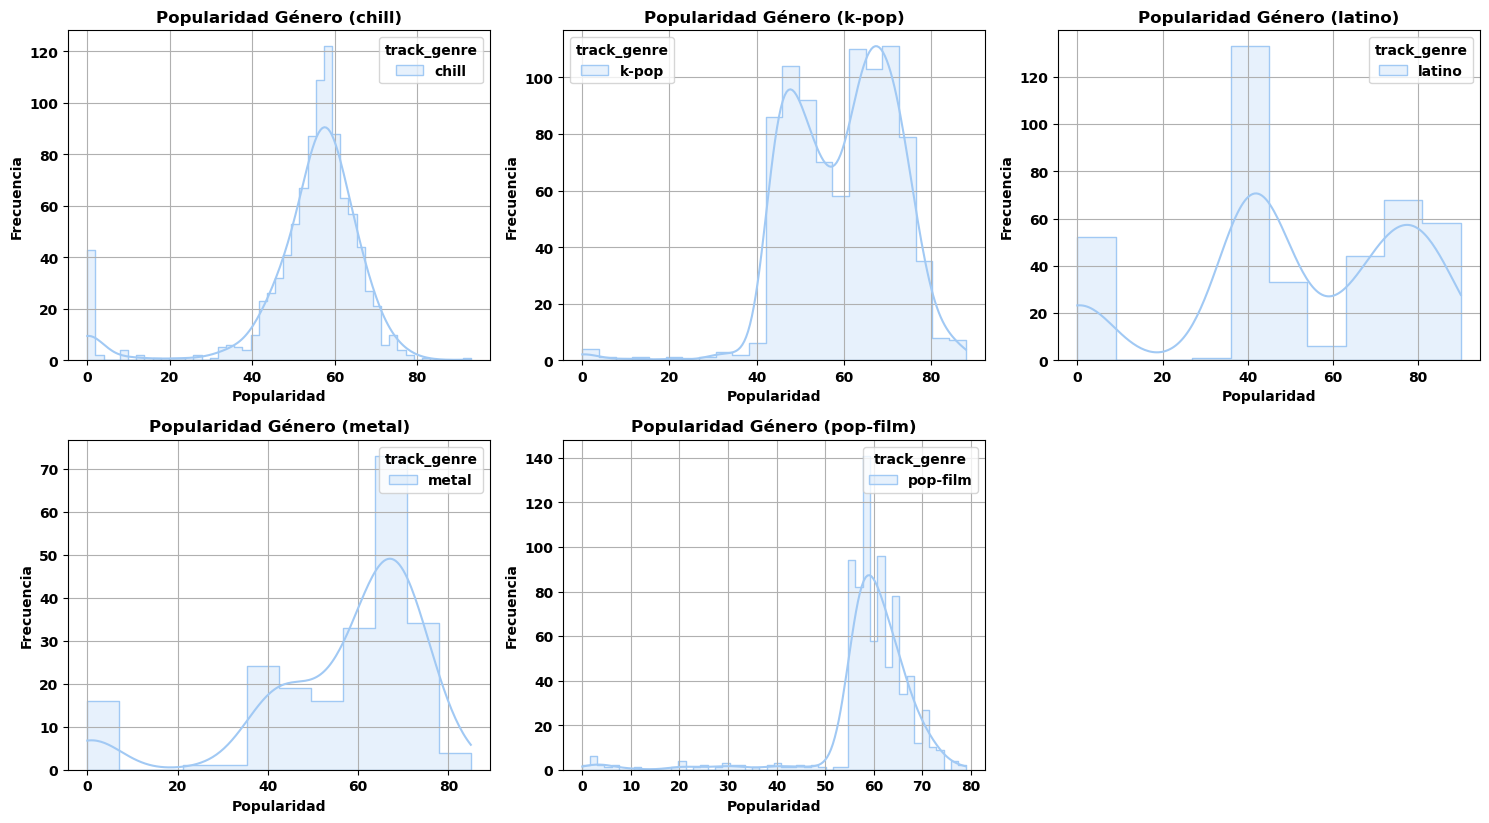

In [128]:
unique_genres = df_top_genres['track_genre'].unique()

cols =  len(unique_genres)
num_cols = 3
num_rows = round(cols/num_cols)+1

plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, genre in enumerate(unique_genres):
    plt.subplot(num_rows, num_cols, i+1)  
    sns.histplot(data=df[df['track_genre'] == genre], x='popularity', hue='track_genre', kde=True, palette='pastel', fill=True,element='step')
    
    plt.title(f'Popularidad Género ({genre})')
    plt.xlabel('Popularidad')
    plt.ylabel('Frecuencia')
    plt.grid(True)

plt.tight_layout()
plt.show()


Observaciones:
La mayoría de los géneros análizados tienen una distribución con un pico en popularidad baja y otro en popularidad alta.
En su mayoría estan sesgados a la derecha.

## Distribución de "duración de pista"

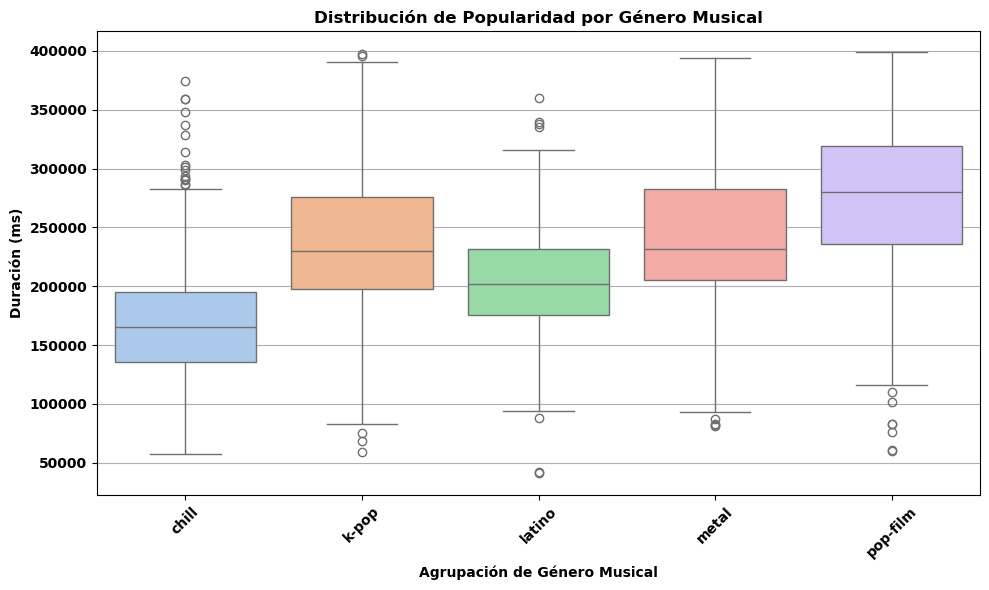

In [129]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='track_genre', y='duration_ms', data=df_top_genres, hue='track_genre', palette='pastel')
plt.title('Distribución de Popularidad por Género Musical')
plt.xlabel('Agrupación de Género Musical')
plt.ylabel('Duración (ms)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Observaciones:
Se observan que todos los grupos de generos musicales analizados del top de géneros musicales por popularidad, tiene una distribución de duración similar.

### Gráfico comparativo de características por agrupación de género musical

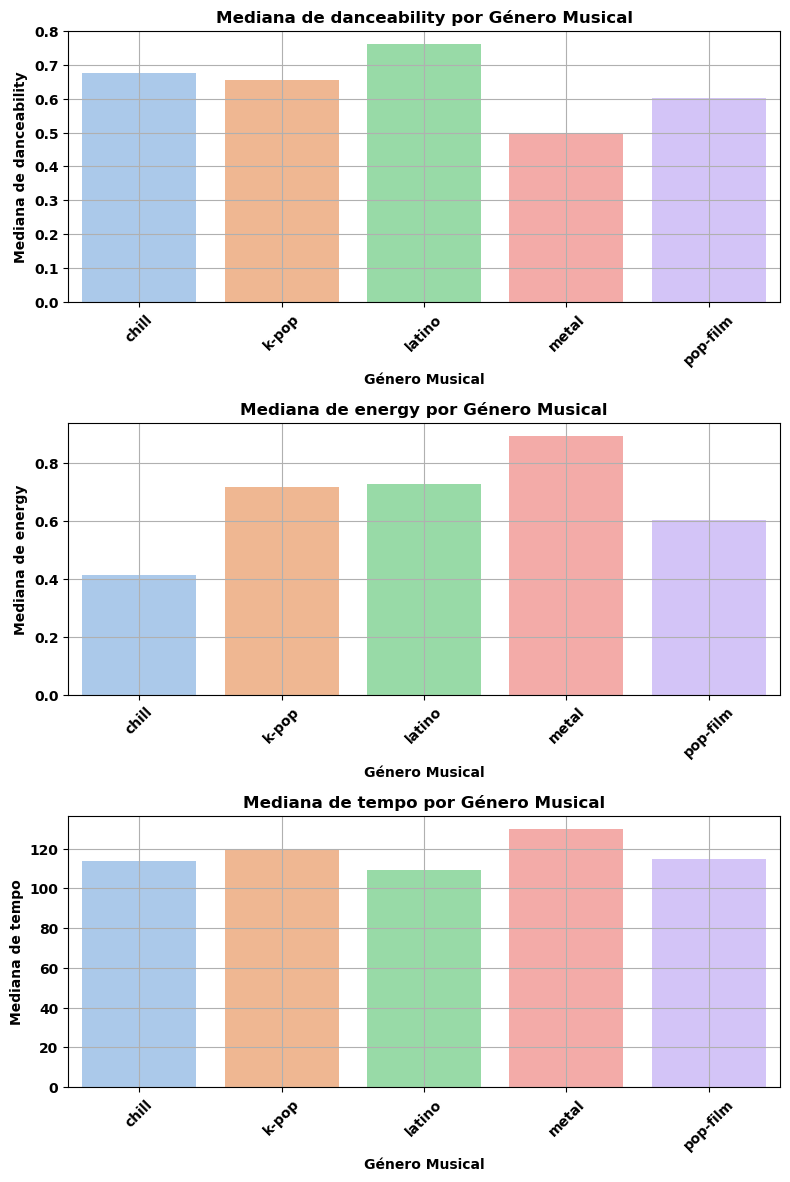

In [138]:
characteristics = ['danceability', 'energy', 'tempo']
plt.figure(figsize=(8, 15))

cols =  len(characteristics)
num_cols = 1
num_rows = round(cols/num_cols)+1
for i, characteristic in enumerate(characteristics, 1):
    df_top_genres_pivot = df_top_genres.pivot_table(index='track_genre', values=characteristics, aggfunc='median').reset_index()
    
    plt.subplot(num_rows, num_cols, i)
    sns.barplot(data=df_top_genres_pivot, x='track_genre', y=characteristic, hue='track_genre', palette='pastel')
    plt.title(f'Mediana de {characteristic} por Género Musical')
    plt.xlabel('Género Musical')
    plt.ylabel(f'Mediana de {characteristic}')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()

Observaciones:

No parece haber ninguna replación entre las variables.